In [48]:
# Importing relevant packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

print("Packages imported!")

Packages imported!


In [26]:
# Loading the data
data = pd.read_csv('data.csv')
data = data.drop('Id', axis=1)
data = data.sample(frac=1).reset_index(drop=True)

print("First 5 rows of entire dataset:")
print(data.head())

# Splitting the data into train and test set
data_len = len(data)
train_len, test_len = int(data_len * 0.6), int(data_len * 0.4)
train_labels, test_labels = data['Species'][:train_len] , data['Species'][train_len:]
data = data.drop('Species', axis=1)
train_data, test_data = data[:train_len], data[train_len:]

print("\nFirst 5 rows of training dataset:")
print(train_data.head())

print("\nFirst 5 rows of testing dataset:")
print(test_data.head())

First 5 rows of entire dataset:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
0            5.3           3.7            1.5           0.2      Iris-setosa
1            7.2           3.0            5.8           1.6   Iris-virginica
2            6.4           2.8            5.6           2.2   Iris-virginica
3            6.7           3.0            5.0           1.7  Iris-versicolor
4            7.7           2.6            6.9           2.3   Iris-virginica

First 5 rows of training dataset:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.3           3.7            1.5           0.2
1            7.2           3.0            5.8           1.6
2            6.4           2.8            5.6           2.2
3            6.7           3.0            5.0           1.7
4            7.7           2.6            6.9           2.3

First 5 rows of testing dataset:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
90            7.

In [28]:
# Defining the distance functions
def manhattan_distance(a: np.ndarray, b: np.ndarray) -> float:
    return np.sum(np.abs(a - b))

def euclidean_distance(a: np.ndarray, b: np.ndarray) -> float:
    return np.sqrt(np.sum((a - b)**2))

In [30]:
# Implementing the KNN algorithm
def KNN(train_data: np.ndarray, train_labels: np.ndarray, test_data: np.ndarray, k: int, distance_func) -> np.ndarray:
    predictions = []
    for i in range(len(test_data)):

        distances = []
        for j in range(len(train_data)):
            distances.append(distance_func(test_data[i], train_data[j]))
        
        distances = list(zip(distances, train_labels))
        distances.sort(key=lambda x: x[0])
        distances = distances[:k]
        labels = [x[1] for x in distances]
        prediction = max(set(labels), key=labels.count)
        predictions.append(prediction)
        
    return np.array(predictions)

In [32]:
# Testing the accuracy of our model
def score_predictions(predictions: np.ndarray, test_labels: np.ndarray) -> float:
    return np.sum(predictions == test_labels) / len(test_labels)

Using euclidean distance:
Best accuracy: 0.9666666666666667
Best value of k: 3


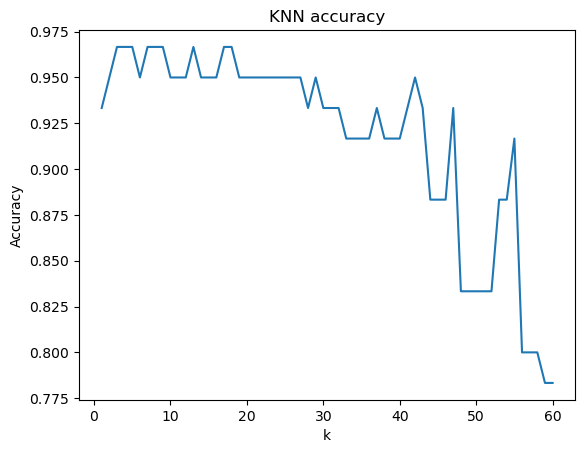

In [34]:
# Using euclidean distance

print("Using euclidean distance:")

k_min = 1
k_max = 60

accuracies = []

for k in range(k_min, k_max + 1):
    predictions = KNN(train_data.values, train_labels.values, test_data.values, k=k, distance_func=euclidean_distance)
    score = score_predictions(predictions, test_labels.values)
    accuracies.append(score)

print(f"Best accuracy: {max(accuracies)}")
print(f"Best value of k: {accuracies.index(max(accuracies)) + k_min}")

plt.plot(range(k_min, k_max + 1), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN accuracy')
plt.show()

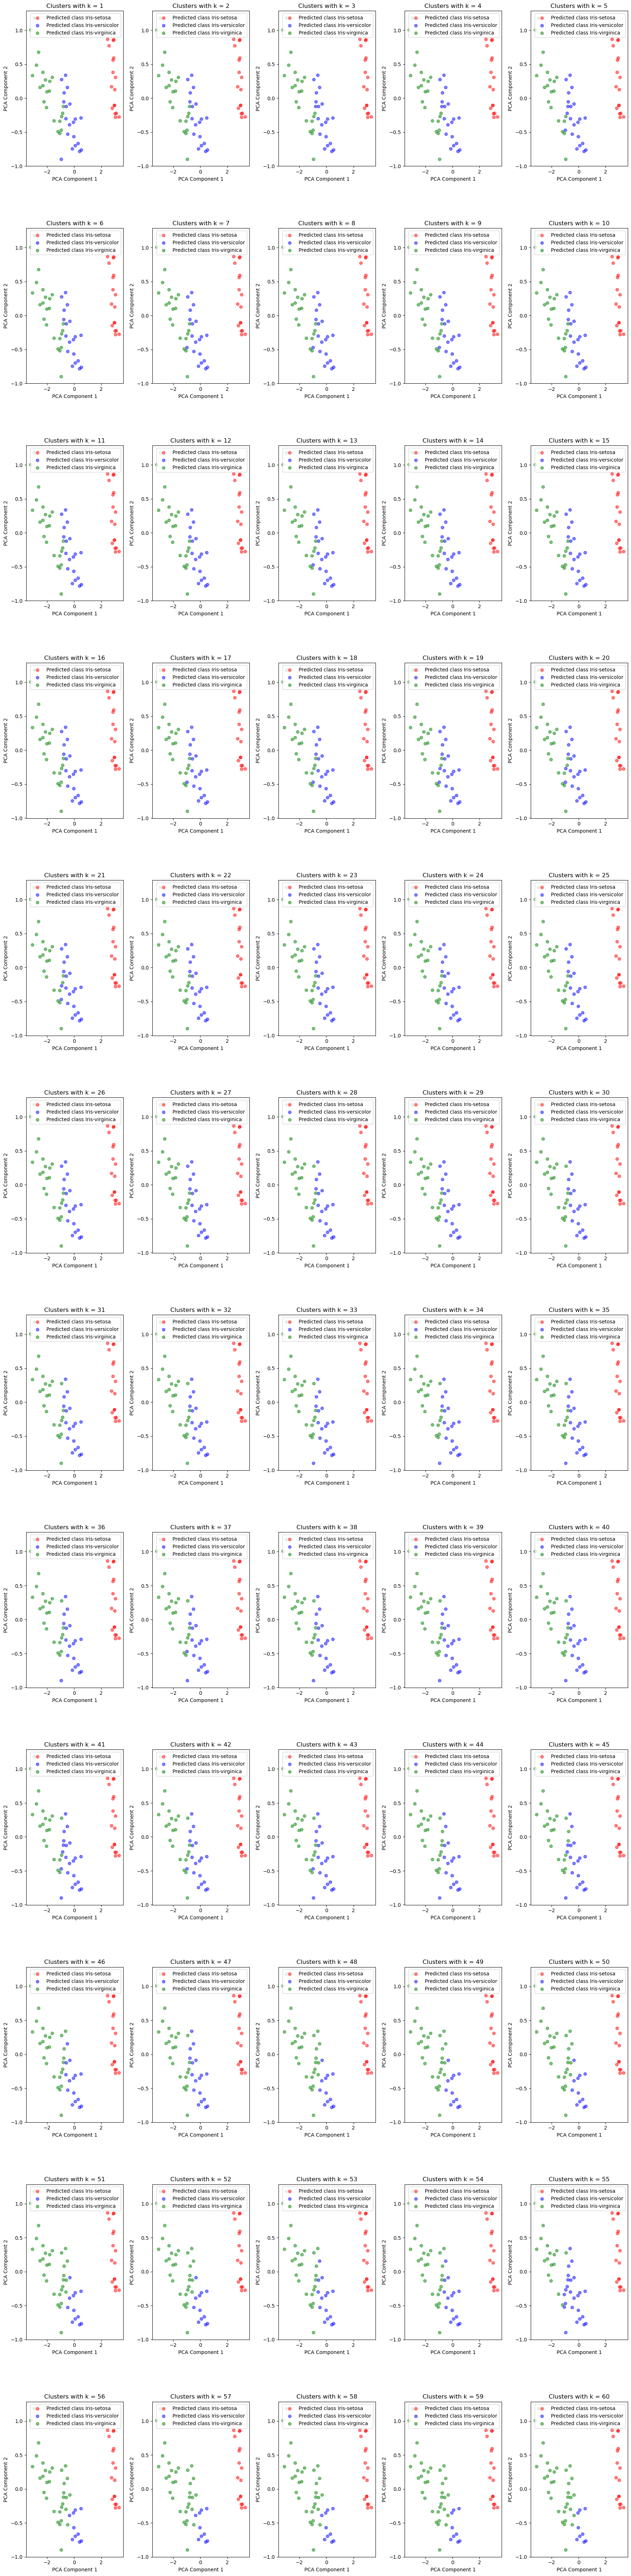

In [36]:
# Plotting the clusters for all values of k

pca = PCA(n_components=2)
test_data_2d = pca.fit_transform(test_data)

k_values = []
for i in range(1, 61):
    k_values.append(i)

n_plots = len(k_values)
n_cols = 5  # Number of columns in the grid
n_rows = (n_plots + n_cols - 1) // n_cols  # Calculate rows needed based on number of k values

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), squeeze=False)
fig.tight_layout(pad=3.0)

# Loop over each k value to predict and plot the results
for idx, k in enumerate(k_values):
    # Get predictions from your kNN function
    y_pred = KNN(train_data.values, train_labels.values, test_data.values, k, euclidean_distance)
    
    # Determine position in the subplot grid
    row, col = divmod(idx, n_cols)
    ax = axes[row, col]

    # Plot the clusters for the current k value
    unique_classes = np.unique(y_pred)  # Find unique classes in predictions to color them
    colors = ['red', 'blue', 'green', 'orange', 'purple'][:len(unique_classes)]  # Adjust colors as needed
    
    for class_label, color in zip(unique_classes, colors):
        ax.scatter(
            test_data_2d[y_pred == class_label, 0], 
            test_data_2d[y_pred == class_label, 1], 
            c=color, label=f"Predicted class {class_label}", alpha=0.5
        )
    
    ax.set_title(f"Clusters with k = {k}")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.legend()

# Adjust layout for readability and show the plot
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

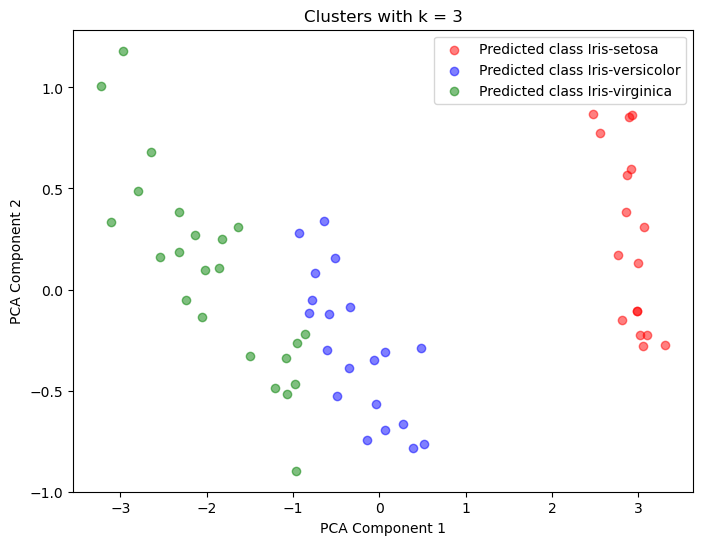

In [38]:
# Plotting the clusters for our best value of k

k = accuracies.index(max(accuracies)) + k_min
y_pred = KNN(train_data.values, train_labels.values, test_data.values, k=k, distance_func=euclidean_distance)

plt.figure(figsize=(8, 6))
    
unique_classes = np.unique(y_pred)  # Find unique classes in predictions to color them
colors = ['red', 'blue', 'green', 'orange', 'purple'][:len(unique_classes)]  # Adjust colors as needed

for class_label, color in zip(unique_classes, colors):
    plt.scatter(
        test_data_2d[y_pred == class_label, 0], 
        test_data_2d[y_pred == class_label, 1], 
        c=color, label=f"Predicted class {class_label}", alpha=0.5
    )

plt.title(f"Clusters with k = {k}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

Using manhattan distance:
Best accuracy: 0.9833333333333333
Best value of k: 13


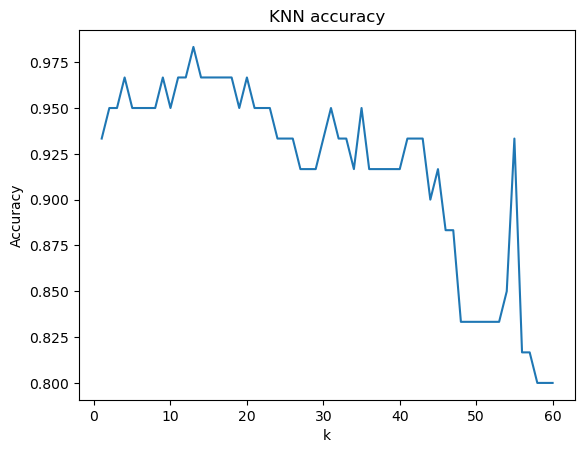

In [40]:
# Using manhattan distance

print("Using manhattan distance:")

k_min = 1
k_max = 60

accuracies = []

for k in range(k_min, k_max + 1):
    predictions = KNN(train_data.values, train_labels.values, test_data.values, k=k, distance_func=manhattan_distance)
    score = score_predictions(predictions, test_labels.values)
    accuracies.append(score)

print(f"Best accuracy: {max(accuracies)}")
print(f"Best value of k: {accuracies.index(max(accuracies)) + k_min}")

plt.plot(range(k_min, k_max + 1), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN accuracy')
plt.show()

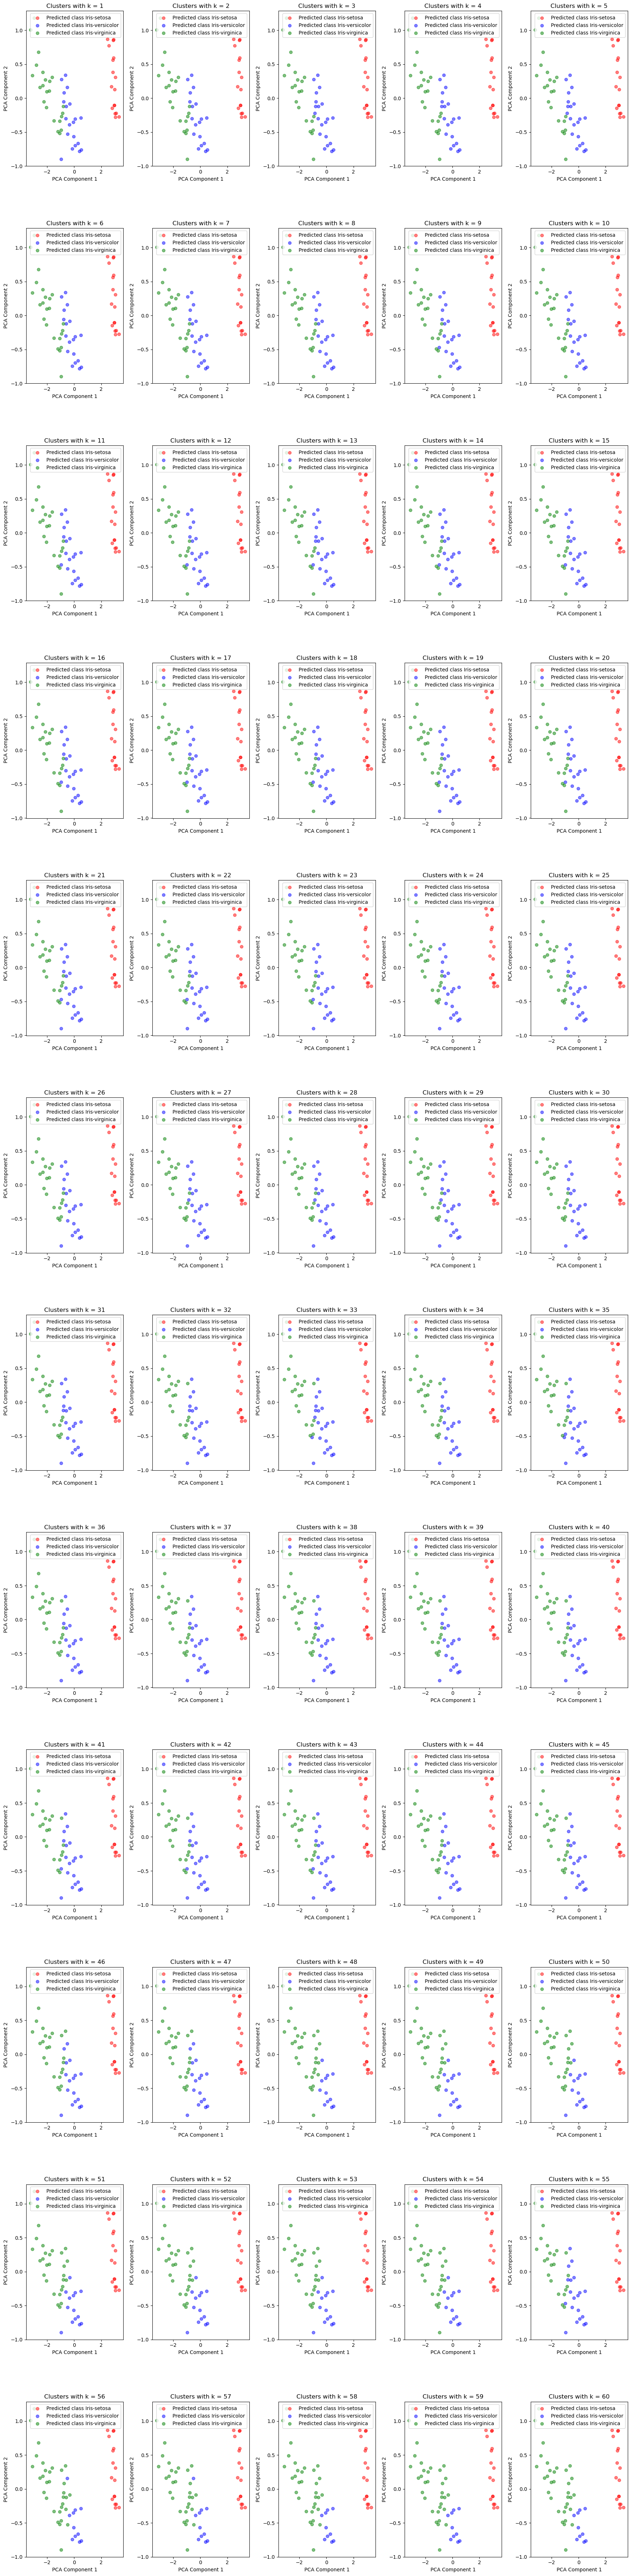

In [44]:
n_plots = len(k_values)
n_cols = 5  # Number of columns in the grid
n_rows = (n_plots + n_cols - 1) // n_cols  # Calculate rows needed based on number of k values

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), squeeze=False)
fig.tight_layout(pad=3.0)

# Loop over each k value to predict and plot the results
for idx, k in enumerate(k_values):
    # Get predictions from your kNN function
    y_pred = KNN(train_data.values, train_labels.values, test_data.values, k, manhattan_distance)
    
    # Determine position in the subplot grid
    row, col = divmod(idx, n_cols)
    ax = axes[row, col]

    # Plot the clusters for the current k value
    unique_classes = np.unique(y_pred)  # Find unique classes in predictions to color them
    colors = ['red', 'blue', 'green', 'orange', 'purple'][:len(unique_classes)]  # Adjust colors as needed
    
    for class_label, color in zip(unique_classes, colors):
        ax.scatter(
            test_data_2d[y_pred == class_label, 0], 
            test_data_2d[y_pred == class_label, 1], 
            c=color, label=f"Predicted class {class_label}", alpha=0.5
        )
    
    ax.set_title(f"Clusters with k = {k}")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.legend()

# Adjust layout for readability and show the plot
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

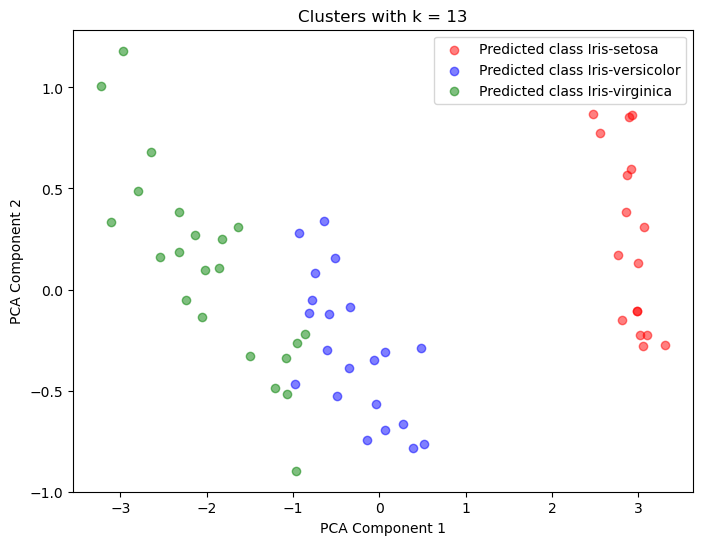

In [46]:
k = accuracies.index(max(accuracies)) + k_min
y_pred = KNN(train_data.values, train_labels.values, test_data.values, k=k, distance_func=manhattan_distance)

plt.figure(figsize=(8, 6))
    
unique_classes = np.unique(y_pred)  # Find unique classes in predictions to color them
colors = ['red', 'blue', 'green', 'orange', 'purple'][:len(unique_classes)]  # Adjust colors as needed

for class_label, color in zip(unique_classes, colors):
    plt.scatter(
        test_data_2d[y_pred == class_label, 0], 
        test_data_2d[y_pred == class_label, 1], 
        c=color, label=f"Predicted class {class_label}", alpha=0.5
    )

plt.title(f"Clusters with k = {k}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()